## Nota

Para esta primera ejecucion, y la que estara en git, estaba usando la compu, de modo que los tiempos no son los mas optimos

In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

## Carga de la base (ya guardada)

In [2]:
gray_matrix = np.load('DatosDF\gray_matrix.npy', allow_pickle=True)
hog = np.load('DatosDF\hog.npy', allow_pickle=True)
estados = np.load('DatosDF\estados.npy', allow_pickle=True)
label = np.load('DatosDF\labels.npy', allow_pickle=True)

In [3]:
df = pd.DataFrame({'gray_matrix': gray_matrix,'hog': hog,'estados': estados,'label': label})

### Separacion en el df por usar, y el entrenamiento y testeo

In [4]:
dfxusar = df[df['estados'] == 1]
elresto = df[df['estados'] == 0]
dfxusar

,gray_matrix,hog,estados,label
16,"[[175, 166, 185, 198, 202, 213, 212, 209, 210,...","[0.20444939, 0.034390625, 0.026585897, 0.01487...",1,angry
23,"[[26, 29, 30, 35, 45, 60, 108, 145, 161, 161, ...","[0.46974203, 0.15378156, 0.0056655, 0.0, 0.002...",1,angry
30,"[[17, 18, 19, 19, 17, 15, 16, 17, 18, 20, 18, ...","[0.16117984, 0.10060929, 0.12280247, 0.0026138...",1,angry
31,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 13, 37, ...","[0.17848918, 0.014774916, 0.0, 0.0, 0.0, 0.0, ...",1,angry
45,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...","[0.025827257, 0.01296422, 0.020755643, 0.0, 0....",1,angry
...,...,...,...,...
35863,"[[9, 38, 69, 99, 86, 102, 111, 105, 65, 58, 64...","[0.23134665, 0.3235038, 0.13396424, 0.05265233...",1,surprise
35869,"[[253, 253, 254, 253, 170, 101, 105, 102, 85, ...","[0.4190711, 0.32569548, 0.0045682807, 0.002312...",1,surprise
35875,"[[252, 247, 146, 93, 94, 89, 99, 94, 93, 83, 9...","[0.32172725, 0.29283354, 0.09000543, 0.0720573...",1,surprise
35878,"[[33, 44, 49, 40, 35, 28, 23, 14, 9, 16, 17, 5...","[0.20763314, 0.31089163, 0.1581842, 0.02511550...",1,surprise


In [5]:
X = np.array(dfxusar['hog'].values.tolist())
y = dfxusar['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19011)

# K-folds y la comparacion inicial

In [6]:
# Definimos el pool de algoritmos de ensamble a evaluar
modelos = []
modelos.append(('RandomForest', RandomForestClassifier()))
modelos.append(('Neural Network',MLPClassifier()))
modelos.append(('KNN',KNeighborsClassifier()))

Mas heavy que el resto

In [7]:
%%time

results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
kfold = KFold(n_splits=10, random_state=42, shuffle= True)  # especifica el particionador de datos a 10-folds CV

for nombre, modelo in modelos:
    cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(nombre)
    print("{}: {} ({})".format(nombre, cv_results.mean(), cv_results.std()))

RandomForest: 0.7979895722870273 (0.02104514075601432)
Neural Network: 0.8397490279250619 (0.017043902601402653)
KNN: 0.8299870390008248 (0.01985212932596414)
CPU times: total: 23min 8s
Wall time: 9min 8s


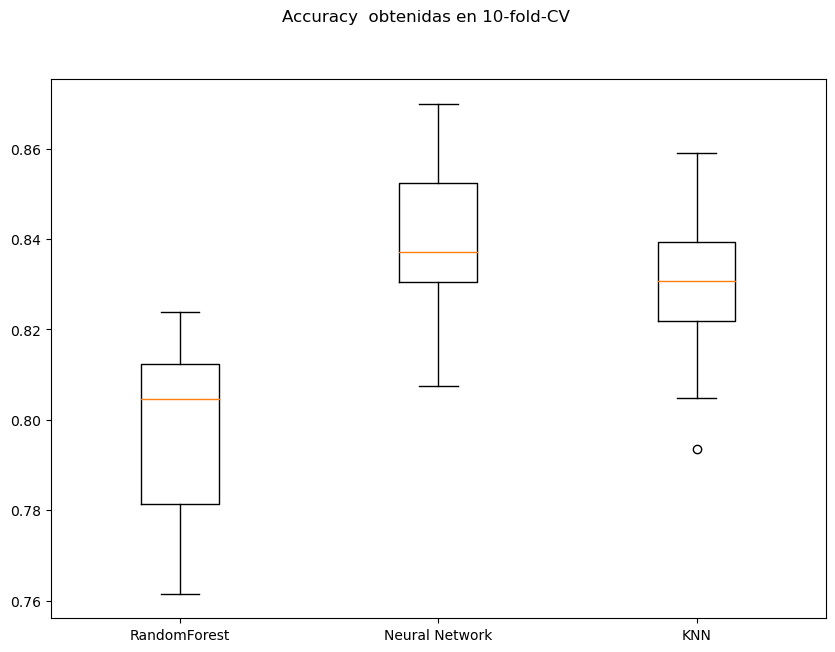

In [8]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('Accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()